<a href="https://colab.research.google.com/github/Rohan171819/Deep_Learning./blob/main/Back_Propagation_Regression_Using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
Data=pd.DataFrame([[8,8,3],[6,9,5],[7,5,8],[12,7,11]],columns=["iq","cgpa","lpa"])
Data

,iq,cgpa,lpa
0,8,8,3
1,6,9,5
2,7,5,8
3,12,7,11


In [3]:
X=Data[["iq","cgpa"]]
Y=Data[["lpa"]]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=10)

In [4]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [5]:
# Creating the Architecture...
model=Sequential()
model.add(Dense(3,activation="linear",input_dim=2))
model.add(Dense(1,activation="linear"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.get_weights()

[array([[ 1.0546111 , -0.8930236 , -0.8314257 ],
        [-0.36190298, -0.7665768 ,  0.07314789]], dtype=float32),
 array([-0.4075558 ,  0.2538824 ,  0.01615728], dtype=float32),
 array([[ 0.7465969 ],
        [-0.09744667],
        [-0.09571296]], dtype=float32),
 array([-0.3513031], dtype=float32)]

In [17]:
new_weights=[np.array([[ 0.1 , 0.1 , 0.1 ],
        [0.1, 0.1 ,  0.1]], dtype=np.float32),
 np.array([0. ,  0. ,  0.], dtype=np.float32),
 np.array([[ 0.1 ],
        [0.1],
        [0.1]], dtype=np.float32),
 np.array([0.], dtype=np.float32)]

In [18]:
model.set_weights(new_weights)

In [19]:
optimizer=keras.optimizers.Adam(learning_rate=0.001)

In [20]:
# Compiling the Model...
model.compile(loss="mean_squared_error",optimizer=optimizer,metrics=['accuracy'])

In [23]:
# Training my model...
history=model.fit(X_train,Y_train,epochs=1000,validation_split=0.2)

Epoch 1/1000
1/1 [==============================] - 0s 81ms/step - loss: 32.8436 - accuracy: 0.0000e+00 - val_loss: 6.9776 - val_accuracy: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 45ms/step - loss: 32.5905 - accuracy: 0.0000e+00 - val_loss: 6.8519 - val_accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 36ms/step - loss: 32.3381 - accuracy: 0.0000e+00 - val_loss: 6.7269 - val_accuracy: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 39ms/step - loss: 32.0862 - accuracy: 0.0000e+00 - val_loss: 6.6027 - val_accuracy: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 39ms/step - loss: 31.8351 - accuracy: 0.0000e+00 - val_loss: 6.4792 - val_accuracy: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 36ms/step - loss: 31.5846 - accuracy: 0.0000e+00 - val_loss: 6.3564 - val_accuracy: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 50ms/step - loss: 31.3349 - accuracy: 0.0000e

In [24]:
Y_predicted=model.predict(X_test)

1/1 [==============================] - 0s 54ms/step


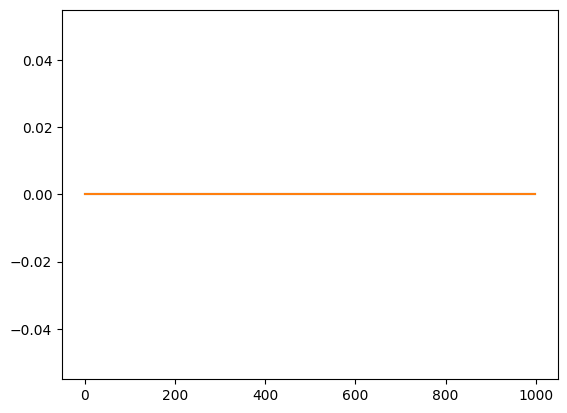

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

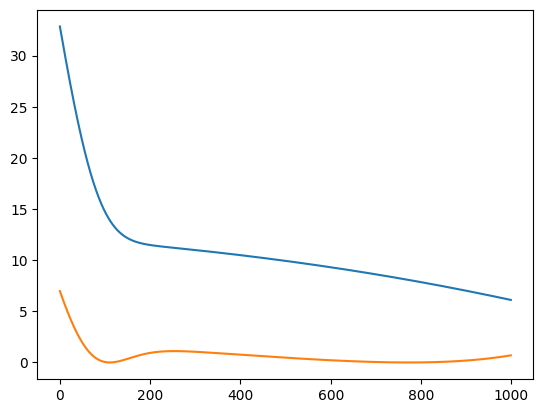

In [26]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()